In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# PARTE A: Visualizamos la imagen dada y a partir de la regla externa generada por nostros determinamos los pixeles de interes que nos pueden dar información relevante sobre los colores.

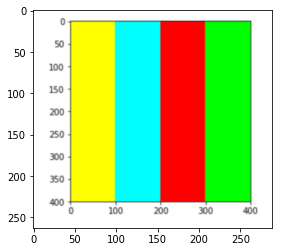

In [2]:
img = cv.imread("res/colores.png",1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, interpolation = 'bicubic')
plt.show()

# Procedemos a sustraer la información de algun pixel en los tres canales para cada color de los 4 presentados, luego los almacenamos en las variables que se ven a continuación

In [3]:
R1=(img[50,60,0])
G1=(img[50,60,1])
B1=(img[50,60,2])
R2=(img[50,120,0])
G2=(img[50,120,1])
B2=(img[50,120,2])
R3=(img[50,180,0])
G3=(img[50,180,1])
B3=(img[50,180,2])
R4=(img[50,240,0])
G4=(img[50,240,1])
B4=(img[50,240,2])


# Creamos un ciclo for anidado que recorre todas las tres matrices al tiempo para cada punto ij, luego condicionamos con activadores condicionales donde se registra un color especifico y donde no

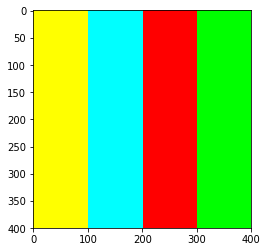

In [4]:
img_add=np.zeros((400,400,3),np.uint8)
for i in range(0,400):
  for j in range(0,400):
    if j <= 100:
      img_add[i,j,0]=R1
      img_add[i,j,1]=G1
      img_add[i,j,2]=B1
    elif j > 100 and j <= 200:
      img_add[i,j,0]=R2
      img_add[i,j,1]=G2
      img_add[i,j,2]=B2
    elif j > 200 and j <= 300:
      img_add[i,j,0]=R3
      img_add[i,j,1]=G3
      img_add[i,j,2]=B3
    
    elif j > 300 and j <= 400:
      img_add[i,j,0]=R4
      img_add[i,j,1]=G4
      img_add[i,j,2]=B4

plt.imshow(img_add)
plt.show()

<font size = 4 color = red><b> Una forma mas sencilla de lograrlo es:</b></font> 
Generar un tensor nulo de dimensiones [i = 400, j = 100, k = 1],  aplicando un poco la teoria de color, sabemos que  el color amarillo se genera santurando los canales R y G, el color azul celeste se genera saturando los canales G y B, el color rojo y verde se obtienen saturando sus respectivos canales; Como tenemos una matrix base de un solo canal, se debe concatenar esta tres veces con sus repectivas saturaciones para obtener una matriz de [400, 100, 3] y así poder imprimirlas desde consola. Una vez obtenido estos colores, se empiezan a concatenar (en el eje j) los tensores en su respectivo orden deseado.

(400, 400, 3)


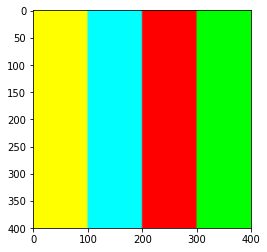

In [5]:
img_rectangular =np.zeros((400,100,1),np.uint8)
img_amarilla = np.concatenate((img_rectangular + 255, img_rectangular + 255, img_rectangular), axis = 2)
img_azul = np.concatenate((img_rectangular, img_rectangular + 255, img_rectangular + 255), axis = 2)
img_rojo = np.concatenate((img_rectangular + 255 , img_rectangular, img_rectangular), axis = 2)
img_verde = np.concatenate((img_rectangular, img_rectangular + 255, img_rectangular), axis = 2)
new_img = np.concatenate((img_amarilla, img_azul, img_rojo, img_verde), axis = 1)
print(new_img.shape)
plt.imshow(new_img, interpolation = 'bicubic')
plt.show()

# Finalmente obtenemos el resultado que es identico a la imagen que nos fue proveida inicialmente

# PARTE B: Se procede a descomponer la imagen en los tres canales RGB y los tres Canales LAB y se les hace su respectivo histograma.

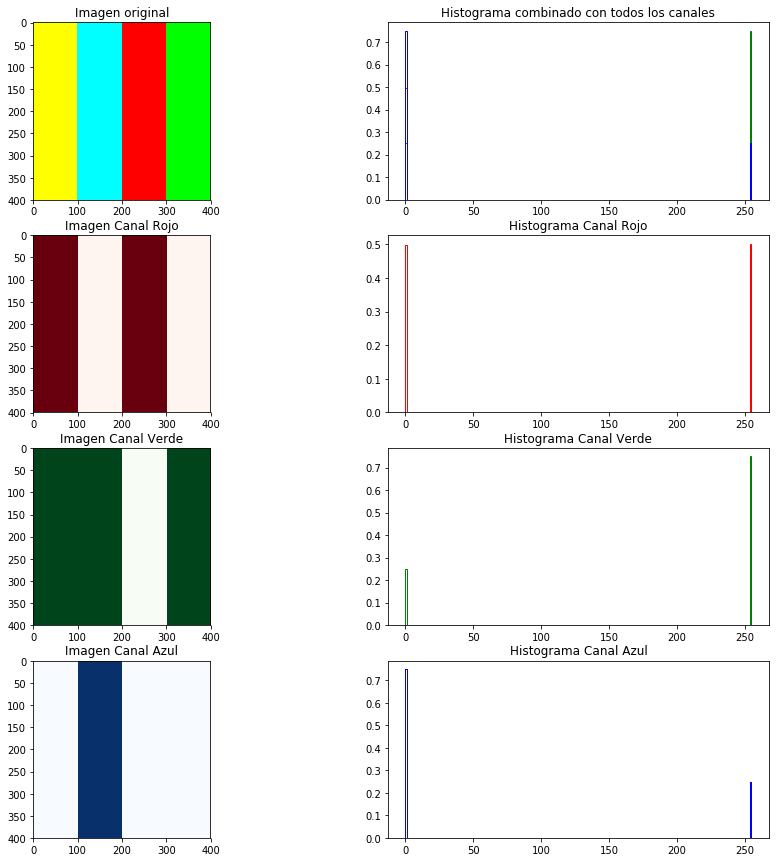

In [13]:
#Se descompone la imagen original en sus respectivos colores 

img_R = img_add[:,:,0]
img_G = img_add[:,:,1]
img_B = img_add[:,:,2]

fig, arreglo_plots = plt.subplots(4,2, figsize=(15,15))
colors = ('r','g','b')

#Se hace un analisis frecuencia de los canales de la imagen original 
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(new_img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma combinado con todos los canales')
for i,col in enumerate(colors):
    img_array_i = img_add[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
    
#Se realiza un analisis de frecuencia en el cana rojo
arreglo_plots[1,0].set_title('Imagen Canal Rojo')
arreglo_plots[1,0].imshow(img_R, cmap='Reds')
arreglo_plots[1,1].set_title('Histograma Canal Rojo')
arreglo_plots[1,1].hist(img_R.ravel(),histtype='step', bins=255, range=(0.0, 255.0),normed=True, color = colors[0])

#Se realiza un analisis de frecuencia en el cana verde
arreglo_plots[2,0].set_title('Imagen Canal Verde')
arreglo_plots[2,0].imshow(img_G, cmap="Greens")
arreglo_plots[2,1].set_title('Histograma Canal Verde')
arreglo_plots[2,1].hist(img_G.ravel(),histtype='step', bins=255, range=(0.0, 255.0), normed=True, color = colors[1])

#Se realiza un analisis de frecuencia en el cana azul
arreglo_plots[3,0].set_title('Imagen Canal Azul')
arreglo_plots[3,0].imshow(img_B, cmap="Blues")
arreglo_plots[3,1].set_title('Histograma Canal Azul')
for i,col in enumerate(colors):
    arreglo_plots[3,1].hist(img_B.ravel(),histtype='step', bins=255, 
                            range=(0.0, 255.0), normed=True, color = colors[2])

Del histograma del canal rojo se observa que el 50% de los pixeles tiene un valor de aproximadamente 255 y el otro 50% tiene un valor aproximado a 0, lo cual corresponde con la imagen del canal, en la cual se aprecian 2 colores (rojo y blanco).

La imagen del canal verde muestra que 3/4 de la imagen es color verde y que 1/4 de la misma es color blanco, lo cual corresponde con lo mostrado en el histograma, con 25% de los pixeles con intensidad 0 y el otro 75% con intensidad 255.

El canal azul contiene una franja azul de 1/4 del total de la imagen, y el resto es blanco. De nuevo esto se corresponde con el histograma, donde el 75% de los pixeles tienen intensidad 0 y los demas intensidad 255.

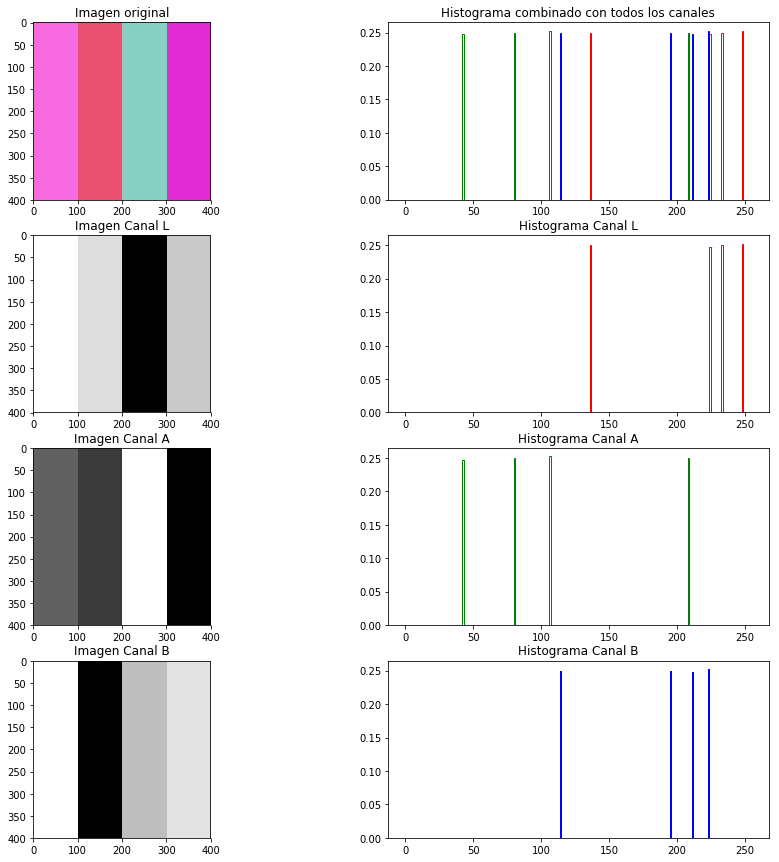

In [14]:
img_LAB = cv.cvtColor(img_add, cv.COLOR_RGB2LAB)

#Se descompone la imagen original en sus respectivos colores 

img_L = img_LAB[:,:,0]
img_A = img_LAB[:,:,1]
img_B = img_LAB[:,:,2]

fig, arreglo_plots = plt.subplots(4,2, figsize=(15,15))
colors = ('r','g','b')

#Se hace un analisis frecuencia de los canales de la imagen original 
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img_LAB, cmap="gray")
arreglo_plots[0,1].set_title('Histograma combinado con todos los canales')
for i,col in enumerate(colors):
    img_array_i = img_LAB[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

#Se realiza un analisis de frecuencia en el cana rojo
arreglo_plots[1,0].set_title('Imagen Canal L')
arreglo_plots[1,0].imshow(img_L, cmap='gray')
arreglo_plots[1,1].set_title('Histograma Canal L')
arreglo_plots[1,1].hist(img_L.ravel(),histtype='step', bins=255, range=(0.0, 255.0),normed=True, color = colors[0])

#Se realiza un analisis de frecuencia en el cana verde
arreglo_plots[2,0].set_title('Imagen Canal A')
arreglo_plots[2,0].imshow(img_A, cmap="gray")
arreglo_plots[2,1].set_title('Histograma Canal A')
arreglo_plots[2,1].hist(img_A.ravel(),histtype='step', bins=255, range=(0.0, 255.0), normed=True, color = colors[1])

#Se realiza un analisis de frecuencia en el cana azul
arreglo_plots[3,0].set_title('Imagen Canal B')
arreglo_plots[3,0].imshow(img_B, cmap="gray")
arreglo_plots[3,1].set_title('Histograma Canal B')
for i,col in enumerate(colors):
    arreglo_plots[3,1].hist(img_B.ravel(),histtype='step', bins=255, 
                            range=(0.0, 255.0), normed=True, color = colors[2])


La imagen del canal de luminosidad muestra 4 franjas de tonos distintos, cada una ocupando 1/4 del total de la imagen, y asi mismo se ven 4 valores en el histograma, cada uno ocupando un 25% de los pixeles de la imagen. Comparando la imagen (con especial atencion a cuales franjas son mas claras o mas oscuras) y el histograma se puede concluir:
- La franja amarilla es la mas luminosa, con aproximadamente 250 de luminosidad
- Le sigue la franja azul celeste, con un valor entre 230 y 235 aproximadamente
- La siguiente es la franja verde, con un valor aproximado entre 220 y 225
- La menos luminosa es la franja roja, cuyo valor esta entre 135 y 140

El canal A (rojo - verde) tambien muestra 4 franjas con distintos tonos. Se puede apreciar que la franja mas clara es la del rojo y la mas oscura es la del verde, tal y como cabria esperar, pues valores positivos indican rojo y valores negativos indican verde.

El canal B (amarillo - azul), de manera similar al canal A, muestra que la franja del amarillo es la mas clara, y la franja del azul celeste es la mas oscura.

# PARTE C:

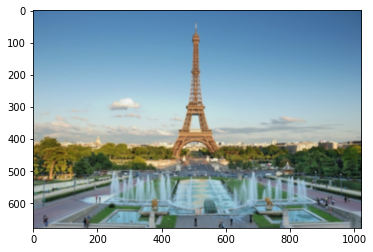

In [8]:
img2 = cv.imread("res/eiffel.jpg",1)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.imshow(img2, interpolation = 'bicubic')
plt.show()

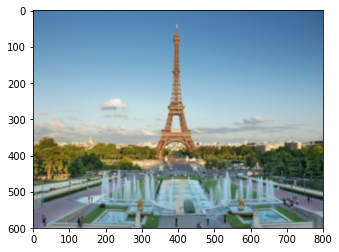

In [9]:
#Re escalamos la imagen
img2=cv.resize(img2,(800,600))
plt.imshow(img2, interpolation = 'bicubic')
plt.show()

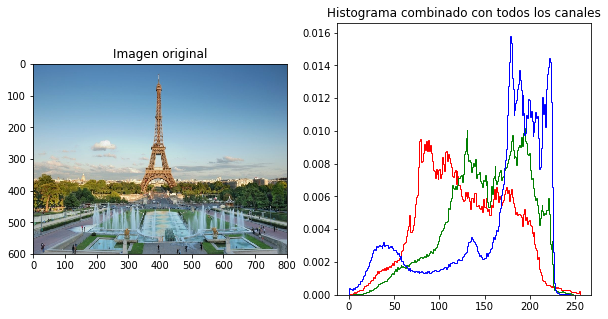

In [10]:
fig, arreglo_plots = plt.subplots(1,2, figsize=(10,5))
colors = ('r','g','b')

#Se dan títulos y se muestra el histograma
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img2)
arreglo_plots[1].set_title('Histograma combinado con todos los canales')
for i,col in enumerate(colors):
    img_array_i = img2[:,:,i].ravel()
    arreglo_plots[1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

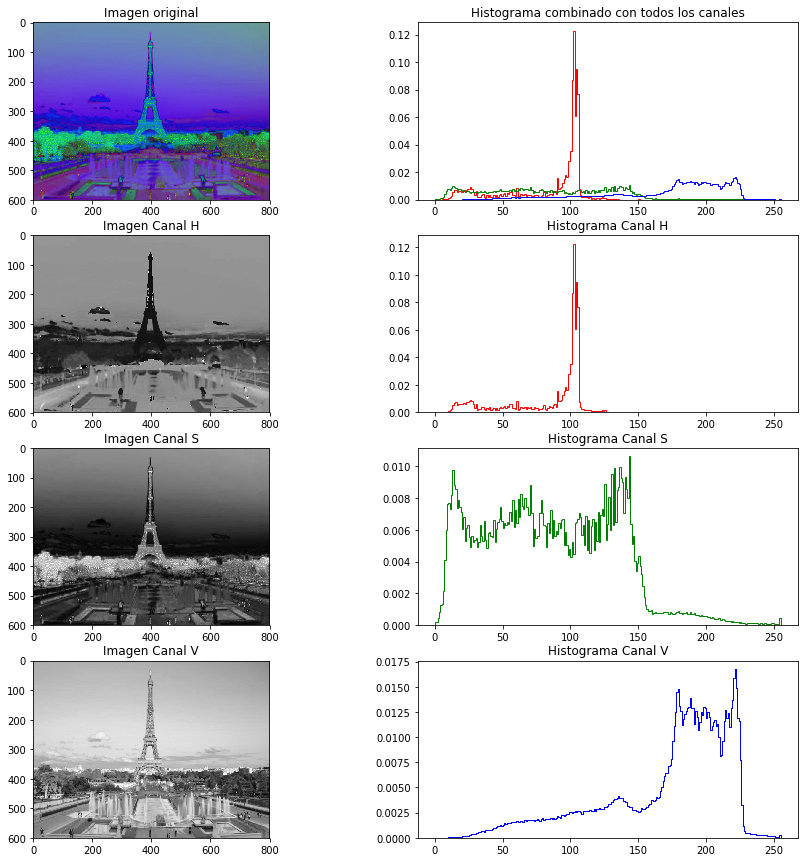

In [11]:
#Se cambia de espacio
img_HSV = cv.cvtColor(img2, cv.COLOR_RGB2HSV)


#Se descompone la imagen original en sus respectivos colores 

img_H = img_HSV[:,:,0]
img_S = img_HSV[:,:,1]
img_V = img_HSV[:,:,2]

fig, arreglo_plots = plt.subplots(4,2, figsize=(15,15))
colors = ('r','g','b')

#Se hace un analisis frecuencia de los canales de la imagen original 
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img_HSV)
arreglo_plots[0,1].set_title('Histograma combinado con todos los canales')
for i,col in enumerate(colors):
    img_array_i = img_HSV[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

#Se realiza un analisis de frecuencia en el cana rojo
arreglo_plots[1,0].set_title('Imagen Canal H')
arreglo_plots[1,0].imshow(img_H, cmap='gray')
arreglo_plots[1,1].set_title('Histograma Canal H')
arreglo_plots[1,1].hist(img_H.ravel(),histtype='step', bins=255, range=(0.0, 255.0),normed=True, color = colors[0])

#Se realiza un analisis de frecuencia en el cana verde
arreglo_plots[2,0].set_title('Imagen Canal S')
arreglo_plots[2,0].imshow(img_S, cmap="gray")
arreglo_plots[2,1].set_title('Histograma Canal S')
arreglo_plots[2,1].hist(img_S.ravel(),histtype='step', bins=255, range=(0.0, 255.0), normed=True, color = colors[1])

#Se realiza un analisis de frecuencia en el cana azul
arreglo_plots[3,0].set_title('Imagen Canal V')
arreglo_plots[3,0].imshow(img_V, cmap="gray")
arreglo_plots[3,1].set_title('Histograma Canal V')
for i,col in enumerate(colors):
    arreglo_plots[3,1].hist(img_V.ravel(),histtype='step', bins=255, 
                            range=(0.0, 255.0), normed=True, color = colors[2])


# 2)